In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [28]:
df=pd.read_csv('/content/laptop.csv')
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X.drop(columns=["Unnamed: 0","Unnamed: 0.1"],inplace=True)
print(X.columns)

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')


In [29]:
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
print(X_Train.head())

     Company   TypeName Inches                               ScreenResolution  \
10        HP   Notebook   15.6                                       1366x768   
147     Asus   Notebook   15.6                              Full HD 1920x1080   
1287      HP   Notebook   15.6                                       1366x768   
767     Dell     Gaming   15.6  IPS Panel Touchscreen / 4K Ultra HD 3840x2160   
816    Razer  Ultrabook   12.5  IPS Panel 4K Ultra HD / Touchscreen 3840x2160   

                                       Cpu   Ram                Memory  \
10              Intel Core i5 7200U 2.5GHz   4GB             500GB HDD   
147   Intel Celeron Dual Core N3350 1.1GHz   4GB               1TB HDD   
1287            Intel Core i7 6500U 2.5GHz   6GB               1TB HDD   
767            Intel Core i7 6700HQ 2.6GHz  16GB  128GB SSD +  1TB HDD   
816             Intel Core i7 7500U 2.5GHz  16GB             512GB SSD   

                          Gpu       OpSys  Weight  
10      Intel HD

In [5]:
df.isna().sum()
for col in df.columns:
  print(col,len(df[col].unique()))

Unnamed: 0 1274
Company 20
TypeName 7
Inches 26
ScreenResolution 41
Cpu 119
Ram 11
Memory 41
Gpu 111
OpSys 10
Weight 190
Price 778


In [ ]:
#Let's create a preprocessing pipeline for this dataset :
# Of which involves:
# We should be removing all kinds of null values and log transforming the prices of the corresponding data rows along with handling duplicates
# as well.
# Label encoding the companies, converting weight and inches columns to type float and remove kg and Gb from the ends of values of these columns
# Lets label encode the opsys as well similiar to the process used for encoding comapnies
# and lets clean the column of cpu by splitting it into the 2 columns : {Company+Brand},{frequency} .
# Similiarly lets clean the ScreenResolution to split into type_of_display and resolution_of_display columns.
# We can now only extract the part of gpu with company and brand of product or just company
# Memory can be split into both memory_size and memory_type


In [6]:
#Dropping all rows where id is null that inherently implies that the row is a null record
df=df.dropna(subset=["Unnamed: 0"])
df.shape
df.isna().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


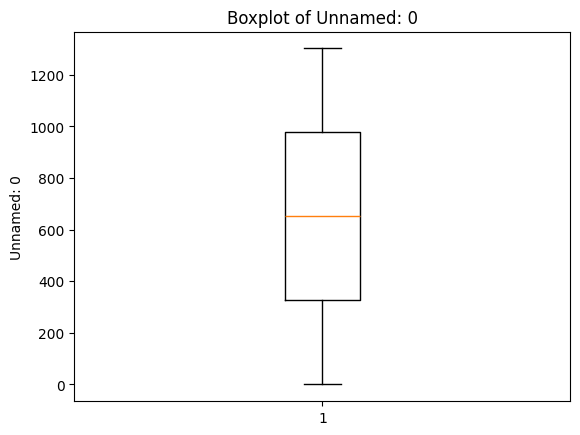

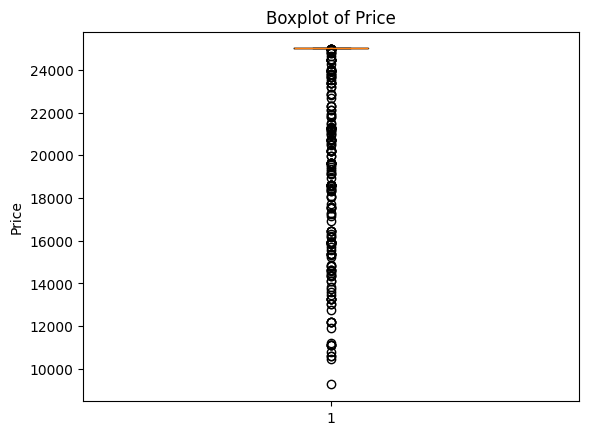

In [9]:
#Now lets check for outliers
for col in df.columns:
  if df[col].dtype=='object':
    continue
  plt.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.ylabel(col)
  plt.show()

In [8]:
#Let's clip all outliers to 25,000 and not more
df["Price"]=df["Price"].clip(upper=25000)
print(df["Price"].max())

25000.0


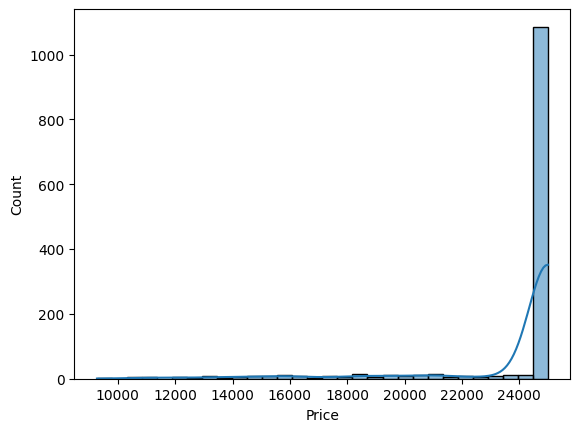

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Price'], bins=30, kde=True)
plt.show()

In [ ]:
#From the above histplot it is clearly visible that most laptops have prices>=25k hence clipping must be avoided and instead we will proceed with log transforming the data column
df["Price"]=np.log(df["Price"])